In [9]:
import pywt
waveletname = 'morl'


In [2]:
from MyEDFImports import import_ecg, get_edf_filenames
names = get_edf_filenames()
tmin, tmax = 100,101
raw = import_ecg(names[0], tmin, tmax)

Extracting EDF parameters from /mnt/c/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [7]:
raw['ECG'][0]

array([[-8.79697871e-05, -8.69626917e-05, -8.49485008e-05,
        -8.69626917e-05, -8.55527581e-05, -8.29343099e-05,
        -8.41428244e-05, -8.83726253e-05, -8.19272145e-05,
        -9.42137789e-05, -9.88464179e-05, -9.62279698e-05,
        -9.58251316e-05, -9.03868162e-05, -8.67612726e-05,
        -8.99839780e-05, -8.33371481e-05, -8.93797208e-05,
        -8.81712062e-05, -8.09201190e-05, -7.99130236e-05,
        -8.49485008e-05, -8.65598535e-05, -8.85740444e-05,
        -8.41428244e-05, -8.93797208e-05, -8.79697871e-05,
        -8.45456626e-05, -8.09201190e-05, -8.37399863e-05,
        -7.99130236e-05, -7.74959945e-05, -7.85030900e-05,
        -8.07186999e-05, -7.95101854e-05, -8.03158618e-05,
        -8.03158618e-05, -8.61570153e-05, -8.23300526e-05,
        -8.39414054e-05, -8.13229572e-05, -7.78988327e-05,
        -8.03158618e-05, -8.45456626e-05, -8.19272145e-05,
        -8.39414054e-05, -7.70931563e-05, -7.20576791e-05,
        -6.68207828e-05, -7.00434882e-05, -7.74959945e-0

In [8]:
raw['ECG'][1]

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
       0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
       0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
       0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
       0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212, 0.214,
       0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 , 0.232,
       0.234, 0.236, 0.238, 0.24 , 0.242, 0.244, 0.246, 0.248, 0.25 ,
       0.252, 0.254,

In [25]:
signal = raw['ECG'][0].T
scales = range(1, 31)

In [26]:
coef, freq = pywt.cwt(signal, scales, 'gaus1')

In [22]:
coef.shape

(30, 1, 501)

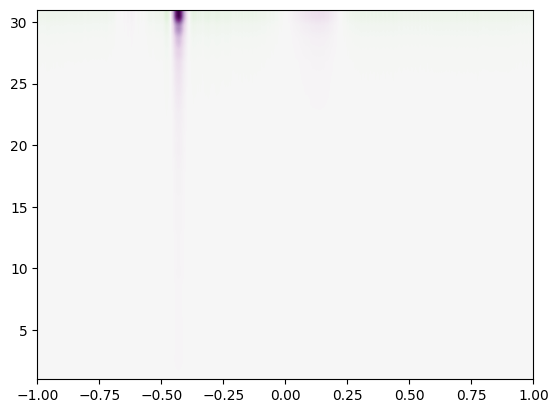

In [28]:
import matplotlib.pylab as plt
plt.imshow(coef, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(coef).max(), vmin=-abs(coef).max())

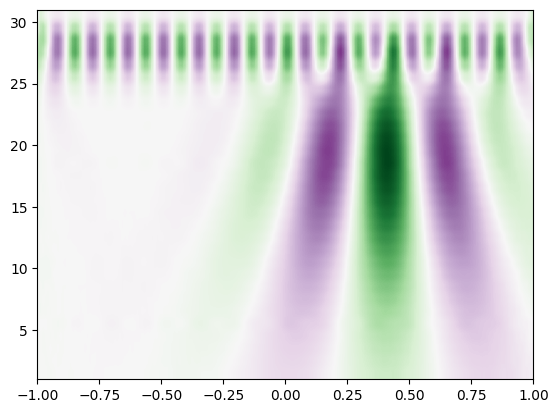

In [14]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [23]:
cwtmatr.shape

(30, 200)

In [24]:
signal.shape

(1, 501)